### scikit-image 사용법
* 참고: https://yunwoong.tistory.com/48

1. 설치

In [1]:
# 사전 라이브러리 설치
!pip install numpy matplotlib

# scikit-image 설치
# !conda install -c conda-forge scikit-image

#또는

!pip install scikit-image


2. 이미지 읽기

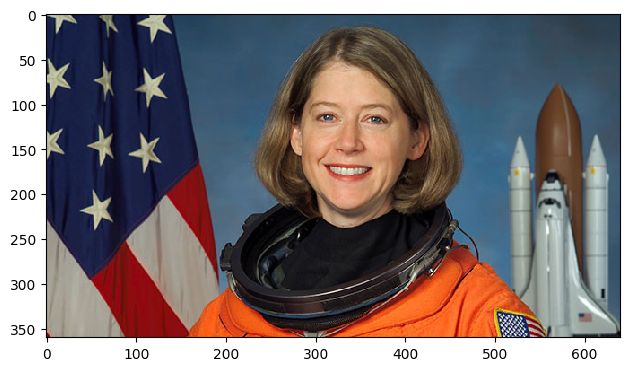

In [1]:
from skimage import io

# 이미지 파일 열기
astronaut_image = io.imread("astronaut.jpg")

# 이미지 보기
io.imshow(astronaut_image)

2. 이미지 쓰기/저장

In [62]:
# 이미지 저장
io.imsave('astronaut_copy.jpg', astronaut_image)

3. 이미지 자르기

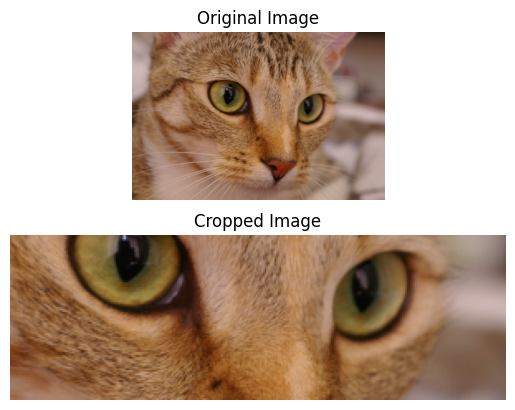

In [39]:
import matplotlib.pyplot as plt
from skimage import data

# skimage.data에서 지원하는 이미지 불러오기
cat_image = data.cat()

# 자를 영역을 정의(y1:y2, x1:x2)하여 자르기
cropped_image = cat_image[100:200, 100:400]

# 원본 이미지 보기
plt.subplot(2, 1, 1)
plt.title('Original Image')
plt.imshow(cat_image)
plt.axis('off')

# 자른 이미지 보기
plt.subplot(2, 1, 2)
plt.title('Cropped Image')
plt.imshow(cropped_image)
plt.axis('off')

plt.show()

4. 색상 변경

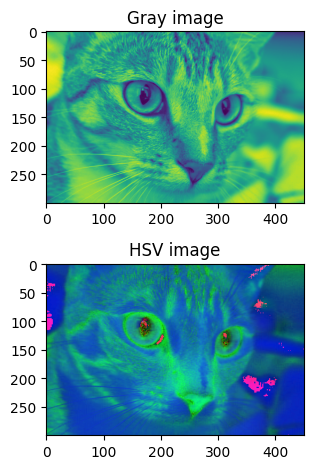

In [44]:
from skimage import color
import matplotlib.pyplot as plt

fig = plt.figure()
rows = 2; cols = 1

# 흑백 이미지로 변환
gray_image = color.rgb2gray(cat_image)
# HSV 이미지로 변환
hsv_image = color.rgb2hsv(cat_image)

ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('Gray image')
ax1.imshow(gray_image)

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('HSV image')
ax2.imshow(hsv_image)

fig.tight_layout()
plt.show()

5. 기하학적 변환

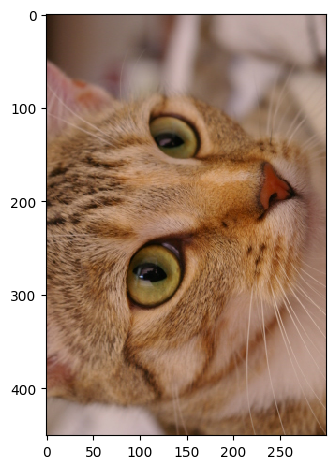

In [45]:
from skimage.transform import rotate

# 90도 회전
rotate_image = rotate(cat_image, 90, resize=True)
io.imshow(rotate_image)

Resize (300, 451, 3) -> (60, 90, 3)


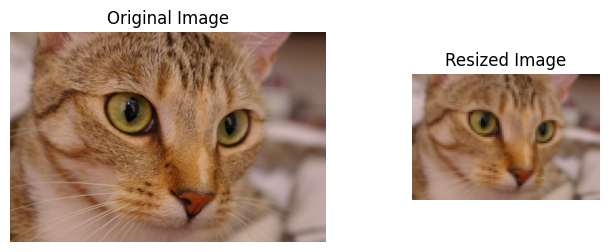

In [53]:
from skimage.transform import resize

# 크기를 1/5 size로 변경
resized_image = resize(cat_image, (cat_image.shape[0] // 5, cat_image.shape[1] // 5), anti_aliasing=True)

print("Resize {} -> {}".format(cat_image.shape, resized_image.shape))

import matplotlib.gridspec as gridspec
plt.figure(figsize=(8, 6))

# GridSpec을 이용하여 레이아웃 정의
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# 큰 subplot
plt.subplot(gs[0, 0])  # 첫 번째 행 첫 번째 열
plt.title('Original Image')
plt.imshow(cat_image)
plt.axis('off')

# 작은 subplot 1
plt.subplot(gs[0, 1])  # 첫 번째 행 두 번째 열
plt.title('Resized Image')
plt.imshow(resized_image)
plt.axis('off')

plt.show()

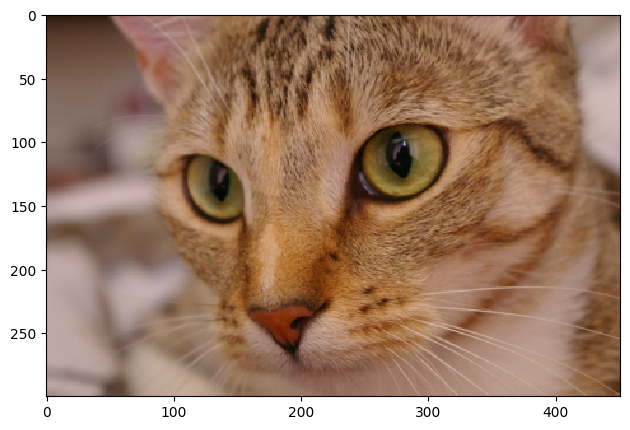

In [54]:
import numpy as np

# 좌우대칭
filp_lr_image = np.fliplr(cat_image)
io.imshow(filp_lr_image)

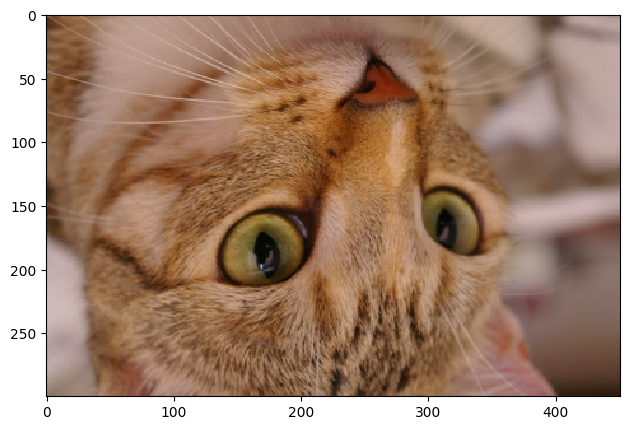

In [55]:
# 상하반전
filp_ud_image = np.flipud(cat_image)
io.imshow(filp_ud_image)

6. 이미지 개선 (Enhancement)

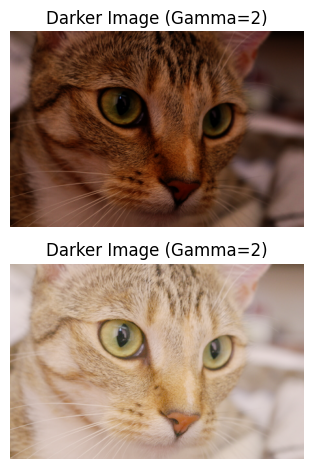

In [56]:
from skimage import exposure

# 밝기 감소 (어둡게)
dark_image = exposure.adjust_gamma(cat_image, gamma=2)
plt.subplot(2, 1, 1)
plt.title('Darker Image (Gamma=2)')
plt.imshow(dark_image)
plt.axis('off')

# 밝기 증가 (밝게)
dark_image = exposure.adjust_gamma(cat_image, gamma=0.5)
plt.subplot(2, 1, 2)
plt.title('Darker Image (Gamma=2)')
plt.imshow(dark_image)
plt.axis('off')

# 결과 보여주기
plt.tight_layout()
plt.show()

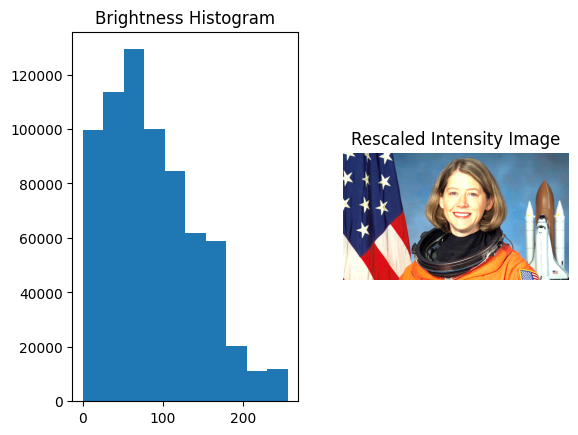

In [64]:
from skimage import exposure
image = astronaut_image.copy()
plt.subplot(1, 2, 1)
plt.title('Brightness Histogram')
plt.hist(image.ravel())

# ==> 히스토그램 분석결과, 200밝기 이전에 값이 몰려있으니 
#     뒷부분(>200)을 자르고 앞부분(<200)을 확장하자.

# 대조를 조정하여 이미지의 밝기 범위를 확장
p0, p90 = np.percentile(image, (0, 90)) # ordering을 해서 뒷부분 제외
img_rescale = exposure.rescale_intensity(image, in_range=(p0, p90))

plt.subplot(1, 2, 2)
plt.title('Rescaled Intensity Image')
plt.imshow(img_rescale)
plt.axis('off')

plt.show()

7. 이미지 필터

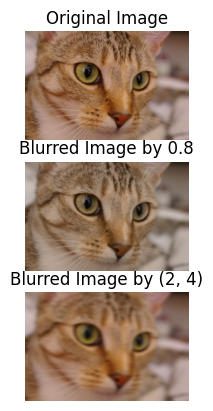

In [77]:
# 가우시안 필터링
from skimage import filters, data

'''
   sigma: 가우스 커널의 표준편차로서 클수록 블러링 효과가 큼
   값은 단일 숫자 혹은 2차원으로 (2, 4)와 같이 줄 수 있음
'''
blurred_image1 = filters.gaussian(cat_image, sigma=0.8)  
blurred_image2 = filters.gaussian(cat_image, sigma=(2, 4, 0)) # 0은 채널

plt.subplot(3, 1, 1)
plt.title('Original Image')
plt.imshow(cat_image)
plt.axis('off')

plt.subplot(3, 1, 2)
plt.title('Blurred Image by 0.8')
plt.imshow(blurred_image1)
plt.axis('off')

plt.subplot(3, 1, 3)
plt.title('Blurred Image by (2, 4)')
plt.imshow(blurred_image2)
plt.axis('off')

plt.show()

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

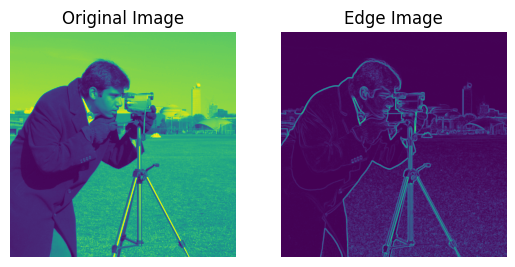

In [9]:
# 소벨 필터
from skimage import filters
from skimage import data
import matplotlib.pyplot as plt

camera_image = data.camera()
edge_image = filters.sobel(camera_image)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(camera_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge Image')
plt.imshow(edge_image)
plt.axis('off')

8. 이미지 합치기

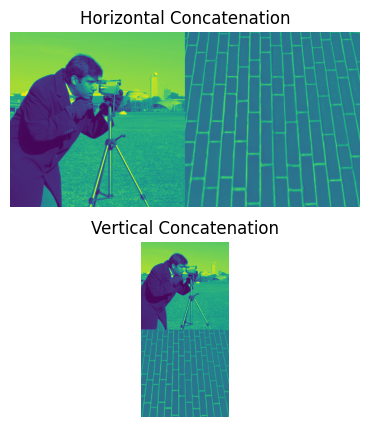

In [15]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

camera_image = data.camera()
brick_image = data.brick()

# 가로로 합치기 (horizontal stack)
h_concatenated = np.hstack((camera_image, brick_image))

# 세로로 합치기 (vertical stack)
v_concatenated = np.vstack((camera_image, brick_image))

# 결과 이미지를 출력합니다.
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].imshow(h_concatenated)
ax[0].set_title('Horizontal Concatenation')
ax[0].axis('off')

ax[1].imshow(v_concatenated)
ax[1].set_title('Vertical Concatenation')
ax[1].axis('off')

plt.show()

9. 박스 그리기 & 텍스트 넣기

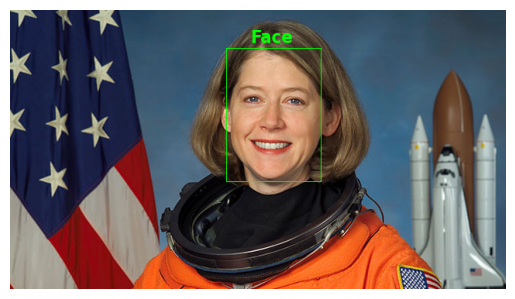

In [23]:
from skimage import io, draw

drawed_image = astronaut_image.copy()

# 박스의 좌상단 (r1, c1)과 우하단 (r2, c2) 좌표를 정의
r1, c1 = 50, 280 
r2, c2 = r1+170, c1+120

# 사각형의 테두리 좌표를 가져옴
rr, cc = draw.rectangle_perimeter(start=(r1, c1), end=(r2, c2), shape=drawed_image.shape)

# 사각형 테두리를 녹색 (0, 255, 0)으로 설정
drawed_image[rr, cc] = [0, 255, 0]
# 텍스트 입력 
plt.text(c1 + 30, r1 - 8, 'Face', color='#00ff00', fontsize=12, fontweight='bold')

# 결과 이미지를 출력
plt.imshow(drawed_image)
plt.axis('off')
plt.show()

##### [참고] Hexcode of Colors
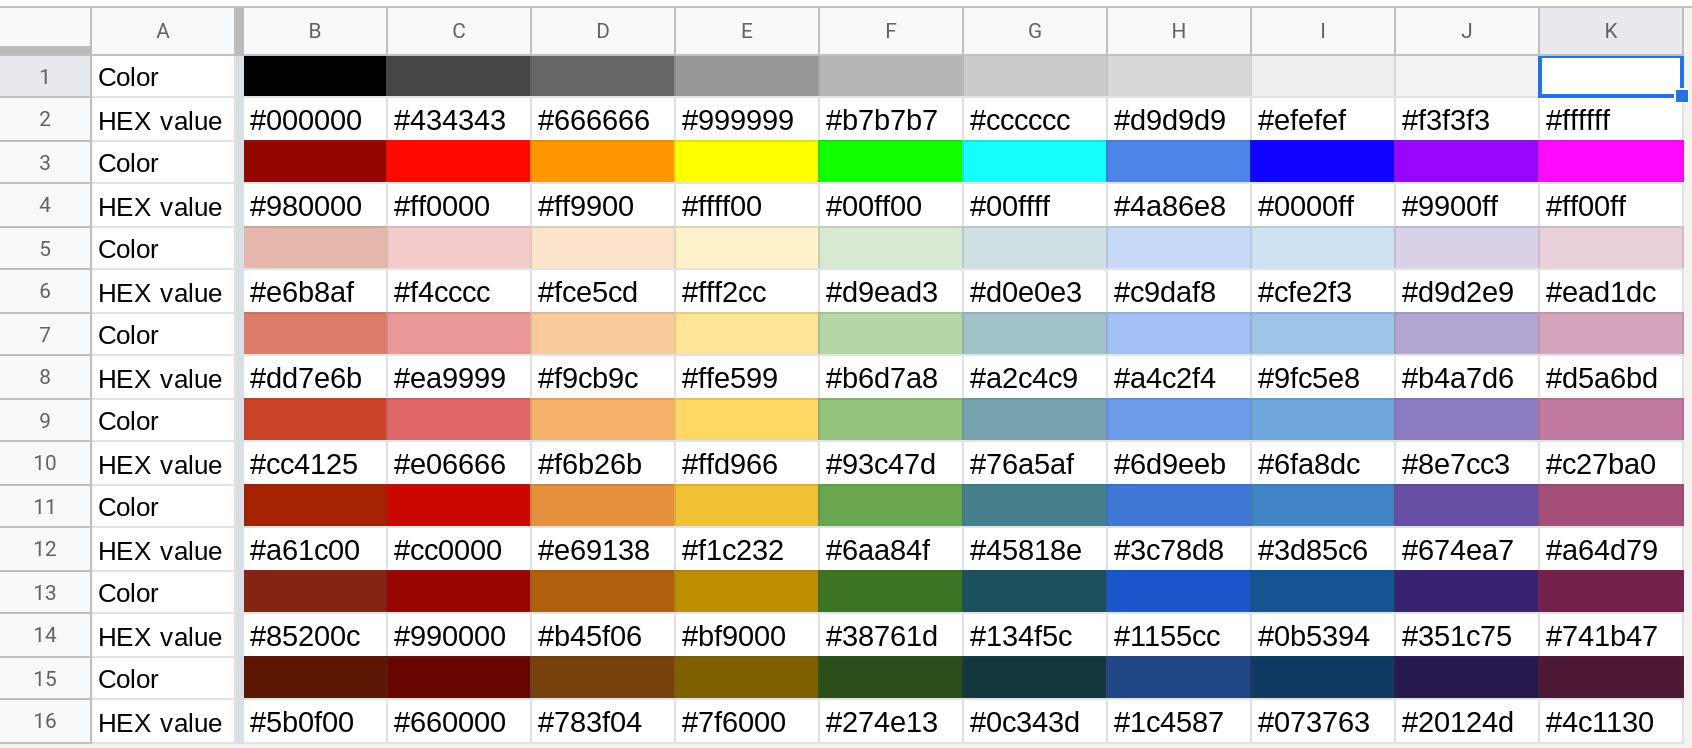

10. 이미지 픽셀값 변경

[138  98  63]


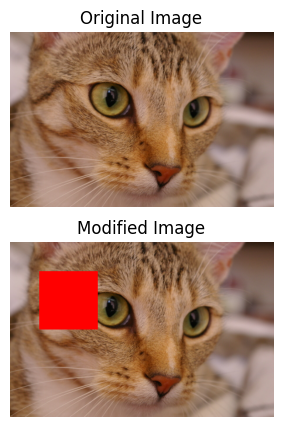

In [27]:
from skimage import io, data
cat_image = data.cat()
modified_image = cat_image.copy()

# 변경할 영역의 좌상단(r1, c1)과 우하단(r2, c2) 좌표를 정의
r1, c1, r2, c2 = 50, 50, 150, 150

# 특정 픽셀값 출력
print(modified_image[r1, c1])

# 해당 영역의 픽셀 값을 빨간색 (255, 0, 0)으로 변경
modified_image[r1:r2, c1:c2] = [255, 0, 0]

# 원본 이미지와 수정된 이미지를 출력
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].imshow(cat_image); ax[0].set_title('Original Image'); ax[0].axis('off')
ax[1].imshow(modified_image); ax[1].set_title('Modified Image'); ax[1].axis('off')
plt.show()


11. 이미지 속성정보 가져오기

In [29]:
import os
from skimage import io

# 이미지 파일 경로 설정
file_path = 'astronaut.jpg'

# 파일명과 확장자를 추출
file_name, file_extension = os.path.splitext(os.path.basename(file_path))

# 이미지를 읽어옵니다.
image = io.imread(file_path)

# 이미지의 크기 (높이, 너비, 채널 수)를 가져옴
height, width = image.shape[:2]

# 이미지의 색상 모드를 결정
if len(image.shape) == 2:
    color_mode = 'Grayscale'
elif len(image.shape) == 3:
    if image.shape[2] == 3:
        color_mode = 'RGB'
    elif image.shape[2] == 4:
        color_mode = 'RGBA'
    else:
        color_mode = 'Unknown'
else:
    color_mode = 'Unknown'

# 이미지 정보 출력
print(f"파일명: {file_name}")
print(f"파일 형식: {file_extension}")
print(f"이미지 크기: {image.shape}")
print(f"색상 모드: {color_mode}")
print(f"너비: {width}, 높이: {height}")

파일명: astronaut
파일 형식: .jpg
이미지 크기: (360, 640, 3)
색상 모드: RGB
너비: 640, 높이: 360
